In [3]:
import pandas as pd
import numpy as np
# Se cambio que el numero de clases ya no es parametro
# Ojo que si establecemos los bins fijos, no hay que sumar el dato minimo
def create_freq_dist_table2(data,bins):
    min_data = data[0].min()
    min_data_ocurr = data[0].value_counts()[min_data]
    max_data = data[0].max()
    range_data = max_data - min_data
    data['class'] = pd.cut(data[0],bins=bins)
    data = data.groupby("class")[0].count().to_frame(name="abs_freq")
    # data.iloc[0]["abs_freq"] += min_data_ocurr
    data["rel_freq"] = data.abs_freq/data.abs_freq.sum()
    data["cum_abs_freq"] = data.abs_freq.cumsum()
    data["cum_rel_freq"] = data["rel_freq"].cumsum()
    data = data.reset_index()
    data['class_mark'] = data['class'].apply(lambda x: (x.left+x.right)/2)
    # cols = data.columns.tolist()    TODO
    # cols = cols[-1:] + cols[:-1]    TODO
    return data

def data_from_table(table):
    media = round(sum(table.apply(lambda x:(x['rel_freq']*x['class_mark']),axis=1)),6)
    std = round(np.sqrt(sum(table.apply(lambda row:((row['class_mark']-media)**2)*row['abs_freq'],axis = 1))/table.iloc[-1,3]),6)
    std1 = np.sqrt(sum(table.apply(lambda row:((row['class_mark']-media)**2)*row['abs_freq'],axis = 1))/(table.iloc[-1,3]-1))
    asim = sum(table.apply(lambda row:((row['class_mark']-media)**3)*row['abs_freq'],axis = 1))/(table.iloc[-1,3]*(std1**3))
    kurt = (sum(table.apply(lambda row:((row['class_mark']-media)**4)*row['abs_freq'],axis = 1))/(table.iloc[-1,3]*(std1**4)))-3
    quantile_25 = percentile(25,table)
    quantile_50 = percentile(50,table)
    quantile_75 = percentile(75,table)
    min=table.iloc[0,0].left
    max=table.iloc[-1,0].right
    return pd.Series([media,std,min,quantile_25,quantile_50,quantile_75,max,asim,kurt])

# Genera datos aleatorios, con la misma distribucion de los datos originales
def generate_data(freq_table,k):
    gen_data = pd.Series(dtype='float64')
    n_data_bef = freq_table.iloc[-1]["cum_abs_freq"]
    intervals, freq_bef = freq_table["class"], freq_table["rel_freq"]
    for i in range(len(intervals)):
        data_numb = int(round(freq_bef.iloc[i]*k,0))
        low_bound = intervals.iloc[i].left
        high_bound = intervals.iloc[i].right
        gen_data = pd.concat([gen_data,pd.Series(np.random.uniform(low_bound,high_bound,data_numb))])
    return pd.DataFrame(gen_data)
 
def percentile(q, table):
    n = max(table['cum_abs_freq'])
    index = (q/100)*n
    condition = table['cum_abs_freq'] >= index
    row =  condition.idxmax()
    Li = table['class'].iloc[row].left
    len_interval = table['class'].iloc[row].length
    Ni = table['abs_freq'].iloc[row]
    j = index - table['cum_abs_freq'].iloc[row-1]
    return (Li + len_interval*(j/Ni))

def data_from_histogram(num_data, lim_inf,lim_sup,lista):
  for i in range(num_data):
    lista.append(np.random.uniform(lim_inf,lim_sup))
  return lista

                             data
0               Media  167.155172
1  Standard Deviation    8.400640
2             Minimum  150.000000
3                 25%  160.250000
4                 50%  167.083333
5                 75%  173.750000
6             Maximum  185.000000
7                Skew    0.061712
8            Kurtosis   -1.071144
El percentil 40 es: 164.6
                          data
                              
Media               167.155000
Standard Deviation    8.401248
Minimum             150.000000
25%                 160.249420
50%                 167.083132
75%                 173.750000
Maximum             185.000000
Skew                  0.065074
Kurtosis             -0.931313
164.5997679814385


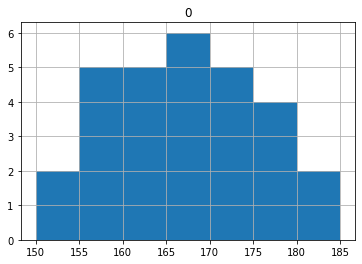

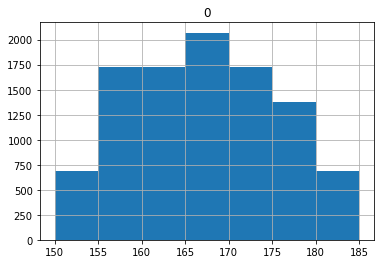

In [4]:
def main():
    lista = []
    lista = data_from_histogram(2,150,155,lista)
    lista = data_from_histogram(5,155,160,lista)
    lista = data_from_histogram(5,160,165,lista)
    lista = data_from_histogram(6,165,170,lista)
    lista = data_from_histogram(5,170,175,lista)
    lista = data_from_histogram(4,175,180,lista)
    lista = data_from_histogram(2,180,185,lista)
    data2 = pd.Series(lista)
    #Vamos a generar los datos como la tabla dada.
    data = pd.DataFrame(data2)
    bins = range(150,186,5)
    data.hist(bins = bins)
    table = create_freq_dist_table2(data, bins)
    stats = data_from_table(table)
    d = pd.DataFrame({'': ['Media','Standard Deviation','Minimum','25%','50%','75%','Maximum','Skew','Kurtosis'],"data":stats})
    print(d) # -> Median = 167.08
    q40 = percentile(40,table)
    print(f"El percentil 40 es: {q40}") # -> Percentile 40 = 164.6; prestamo denegado
    datos_generados = generate_data(table,10000)
    datos_generados.hist(bins = bins)
    table2 = create_freq_dist_table2(datos_generados, bins)
    stats2 = data_from_table(table2)
    d2 = pd.DataFrame({'': ['Media','Standard Deviation','Minimum','25%','50%','75%','Maximum','Skew','Kurtosis'],"data":stats2}).set_index('')
    print(d2) # -> Median = 167.08
    q40_simulated = percentile(40,table2)
    print(q40_simulated) # -> Percentile 40 = 164.6; prestamo denegado
main()